In [87]:
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv("DT2.csv")

In [4]:
df=df.drop(columns="Unnamed: 0")

In [10]:
df

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_cat
0,553.0,8.0,166.0,0.644172,1.0,0.838384,5.0,1.0,0.0,0.0,...,0.100000,0.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,High Engagement
1,553.0,7.0,245.0,0.616667,1.0,0.762821,8.0,5.0,1.0,0.0,...,0.100000,0.50,-0.341667,-0.500000,-0.125000,0.000000,0.000000,0.500000,0.000000,Low Engagement
2,553.0,11.0,195.0,0.637838,1.0,0.785124,6.0,4.0,1.0,0.0,...,0.136364,1.00,0.000000,0.000000,0.000000,0.625000,0.175000,0.125000,0.175000,Low Engagement
3,553.0,12.0,245.0,0.632911,1.0,0.771242,8.0,5.0,0.0,0.0,...,0.033333,0.60,-0.108631,-0.166667,-0.071429,0.600000,0.200000,0.100000,0.200000,Moderate Engagement
4,553.0,8.0,178.0,0.656051,1.0,0.797980,7.0,5.0,1.0,0.0,...,0.033333,0.50,-0.095833,-0.133333,-0.050000,0.000000,0.000000,0.500000,0.000000,Moderate Engagement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,9.0,11.0,575.0,0.530466,1.0,0.681440,8.0,5.0,1.0,0.0,...,0.033333,0.70,-0.343519,-1.000000,-0.100000,0.454545,0.136364,0.045455,0.136364,Moderate Engagement
4084,9.0,9.0,904.0,0.472158,1.0,0.606822,27.0,2.0,2.0,0.0,...,0.100000,0.60,-0.225694,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,Moderate Engagement
4085,9.0,11.0,1122.0,0.439421,1.0,0.635258,4.0,1.0,6.0,0.0,...,0.100000,1.00,-0.262500,-1.000000,-0.100000,0.300000,0.166667,0.200000,0.166667,High Engagement
4086,9.0,12.0,429.0,0.514925,1.0,0.658436,3.0,3.0,3.0,0.0,...,0.166667,0.75,-0.179847,-0.312500,-0.025000,0.000000,0.000000,0.500000,0.000000,High Engagement


In [6]:
bins_shares = [0, 1000, 2000, 5000, np.inf]
# Discretize the shares column and create a new categorical column
df['shares_cat'] = pd.cut(df['shares'], bins=bins_shares, labels=['Low Engagement', 'Moderate Engagement', 'High Engagement', 'Viral'])

In [8]:
df.drop(columns="shares", inplace=True)

In [9]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_cat
0,553.0,8.0,166.0,0.644172,1.0,0.838384,5.0,1.0,0.0,0.0,...,0.100000,0.5,0.000000,0.000000,0.000000,0.000,0.000,0.500,0.000,High Engagement
1,553.0,7.0,245.0,0.616667,1.0,0.762821,8.0,5.0,1.0,0.0,...,0.100000,0.5,-0.341667,-0.500000,-0.125000,0.000,0.000,0.500,0.000,Low Engagement
2,553.0,11.0,195.0,0.637838,1.0,0.785124,6.0,4.0,1.0,0.0,...,0.136364,1.0,0.000000,0.000000,0.000000,0.625,0.175,0.125,0.175,Low Engagement
3,553.0,12.0,245.0,0.632911,1.0,0.771242,8.0,5.0,0.0,0.0,...,0.033333,0.6,-0.108631,-0.166667,-0.071429,0.600,0.200,0.100,0.200,Moderate Engagement
4,553.0,8.0,178.0,0.656051,1.0,0.797980,7.0,5.0,1.0,0.0,...,0.033333,0.5,-0.095833,-0.133333,-0.050000,0.000,0.000,0.500,0.000,Moderate Engagement


In [11]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset

y=df.shares_cat
X= df.drop(columns='shares_cat')

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a recursive feature eliminator and fit it to the data
rfe = RFE(estimator=clf, n_features_to_select=10)
rfe.fit(X, y)

# Print the rankings of the features
for i in range(X.shape[1]):
    print(f"Feature {i+1}: {rfe.ranking_[i]}")

Feature 1: 1
Feature 2: 18
Feature 3: 8
Feature 4: 1
Feature 5: 35
Feature 6: 11
Feature 7: 20
Feature 8: 30
Feature 9: 19
Feature 10: 33
Feature 11: 4
Feature 12: 29
Feature 13: 34
Feature 14: 5
Feature 15: 1
Feature 16: 21
Feature 17: 36
Feature 18: 3
Feature 19: 15
Feature 20: 9
Feature 21: 1
Feature 22: 12
Feature 23: 17
Feature 24: 1
Feature 25: 1
Feature 26: 2
Feature 27: 1
Feature 28: 7
Feature 29: 14
Feature 30: 13
Feature 31: 1
Feature 32: 1
Feature 33: 16
Feature 34: 26
Feature 35: 6
Feature 36: 1
Feature 37: 24
Feature 38: 27
Feature 39: 10
Feature 40: 25
Feature 41: 28
Feature 42: 22
Feature 43: 23
Feature 44: 31
Feature 45: 32


In [12]:
ranks=list(rfe.ranking_)

In [13]:
col=list(X.columns)

In [14]:
col_ranks=dict(zip(col, ranks))

In [15]:
col_ranks

{'timedelta': 1,
 'n_tokens_title': 18,
 'n_tokens_content': 8,
 'n_unique_tokens': 1,
 'n_non_stop_words': 35,
 'n_non_stop_unique_tokens': 11,
 'num_hrefs': 20,
 'num_self_hrefs': 30,
 'num_imgs': 19,
 'num_videos': 33,
 'average_token_length': 4,
 'num_keywords': 29,
 'kw_min_min': 34,
 'kw_max_min': 5,
 'kw_avg_min': 1,
 'kw_min_max': 21,
 'kw_max_max': 36,
 'kw_avg_max': 3,
 'kw_min_avg': 15,
 'kw_max_avg': 9,
 'kw_avg_avg': 1,
 'self_reference_min_shares': 12,
 'self_reference_max_shares': 17,
 'self_reference_avg_sharess': 1,
 'LDA_00': 1,
 'LDA_01': 2,
 'LDA_02': 1,
 'LDA_03': 7,
 'LDA_04': 14,
 'global_subjectivity': 13,
 'global_sentiment_polarity': 1,
 'global_rate_positive_words': 1,
 'global_rate_negative_words': 16,
 'rate_positive_words': 26,
 'rate_negative_words': 6,
 'avg_positive_polarity': 1,
 'min_positive_polarity': 24,
 'max_positive_polarity': 27,
 'avg_negative_polarity': 10,
 'min_negative_polarity': 25,
 'max_negative_polarity': 28,
 'title_subjectivity': 22,

In [16]:
imp_cols = [col for col, value in col_ranks.items() if value==1]

In [17]:
imp_cols

['timedelta',
 'n_unique_tokens',
 'kw_avg_min',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_02',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'avg_positive_polarity']

In [18]:
model_df=df[['n_non_stop_unique_tokens','kw_avg_min', 'kw_avg_max', 'kw_max_avg', 'LDA_00', 'LDA_01', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words', 'shares_cat']]

In [99]:
model_df.to_csv("DT_Train.csv")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(model_df.drop(columns='shares_cat'), model_df.shares_cat, test_size=0.3, random_state=42)

In [21]:
X_train

,n_non_stop_unique_tokens,kw_avg_min,kw_avg_max,kw_max_avg,LDA_00,LDA_01,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words
3075,0.569264,137.000000,401450.000000,3483.538140,0.050003,0.050003,0.495779,0.006670,0.029563,0.025707
1078,0.741379,178.375000,166462.500000,3505.533456,0.150795,0.025001,0.472024,0.233482,0.036066,0.009836
1684,0.649402,293.888889,133230.000000,5955.555556,0.020147,0.020243,0.411983,0.112082,0.036675,0.013447
1569,0.634361,226.142857,183275.000000,3661.988506,0.025039,0.025002,0.415773,0.154390,0.032110,0.011468
2091,0.587922,187.000000,311700.000000,4630.789836,0.020853,0.020010,0.413697,0.158793,0.047831,0.010011
...,...,...,...,...,...,...,...,...,...,...
1130,0.708134,157.875000,168622.222222,5809.250000,0.023044,0.163114,0.423810,0.123529,0.035088,0.015038
1294,0.655660,217.222222,223333.333333,8794.683333,0.022252,0.022427,0.419545,0.140718,0.039234,0.010036
860,0.692935,143.000000,168716.666667,3286.669443,0.033356,0.033358,0.470807,0.136366,0.038820,0.020186
3507,0.736111,110.285714,233642.857143,4299.892612,0.028833,0.028834,0.262963,0.111111,0.017094,0.008547


In [98]:
X_test

,n_non_stop_unique_tokens,kw_avg_min,kw_avg_max,kw_max_avg,LDA_00,LDA_01,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words
599,0.712934,252.600000,194570.000000,7669.200000,0.020050,0.020001,0.490718,0.145589,0.051233,0.011385
752,0.656997,159.000000,189983.333333,3281.271297,0.366444,0.033334,0.411752,0.040948,0.034826,0.018905
2018,0.837398,204.333333,274868.166667,3586.062823,0.033336,0.033335,0.386019,0.105579,0.020101,0.015075
1001,0.761431,295.500000,249800.000000,4616.950197,0.442412,0.040008,0.460712,0.193991,0.050412,0.012346
2517,0.680769,187.500000,187180.000000,3535.942862,0.436329,0.040011,0.565639,0.119751,0.030733,0.014184
...,...,...,...,...,...,...,...,...,...,...
4008,0.681081,150.571429,297628.571429,4994.652632,0.028642,0.028576,0.339706,-0.042647,0.011527,0.017291
3984,0.709302,36.714286,413528.571429,3400.887791,0.028692,0.028573,0.359975,0.196465,0.033088,0.003676
1350,0.643275,278.666667,257882.777778,8356.156250,0.142110,0.022393,0.348516,0.117548,0.038917,0.013536
765,0.702703,296.875000,152677.777778,3287.637782,0.022225,0.022379,0.493853,0.192561,0.049505,0.014851


Index(['n_non_stop_unique_tokens', 'kw_avg_min', 'kw_avg_max', 'kw_max_avg',
       'LDA_00', 'LDA_01', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words'],
      dtype='object')


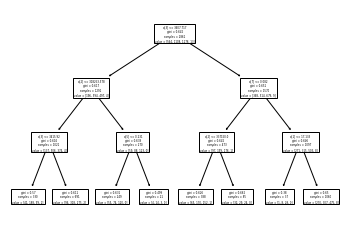

In [96]:
MyDT_R=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=3, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)


MyDT_R.fit(X_train, y_train)

tree.plot_tree(MyDT_R)

feature_namesR=X_train.columns
print(feature_namesR)

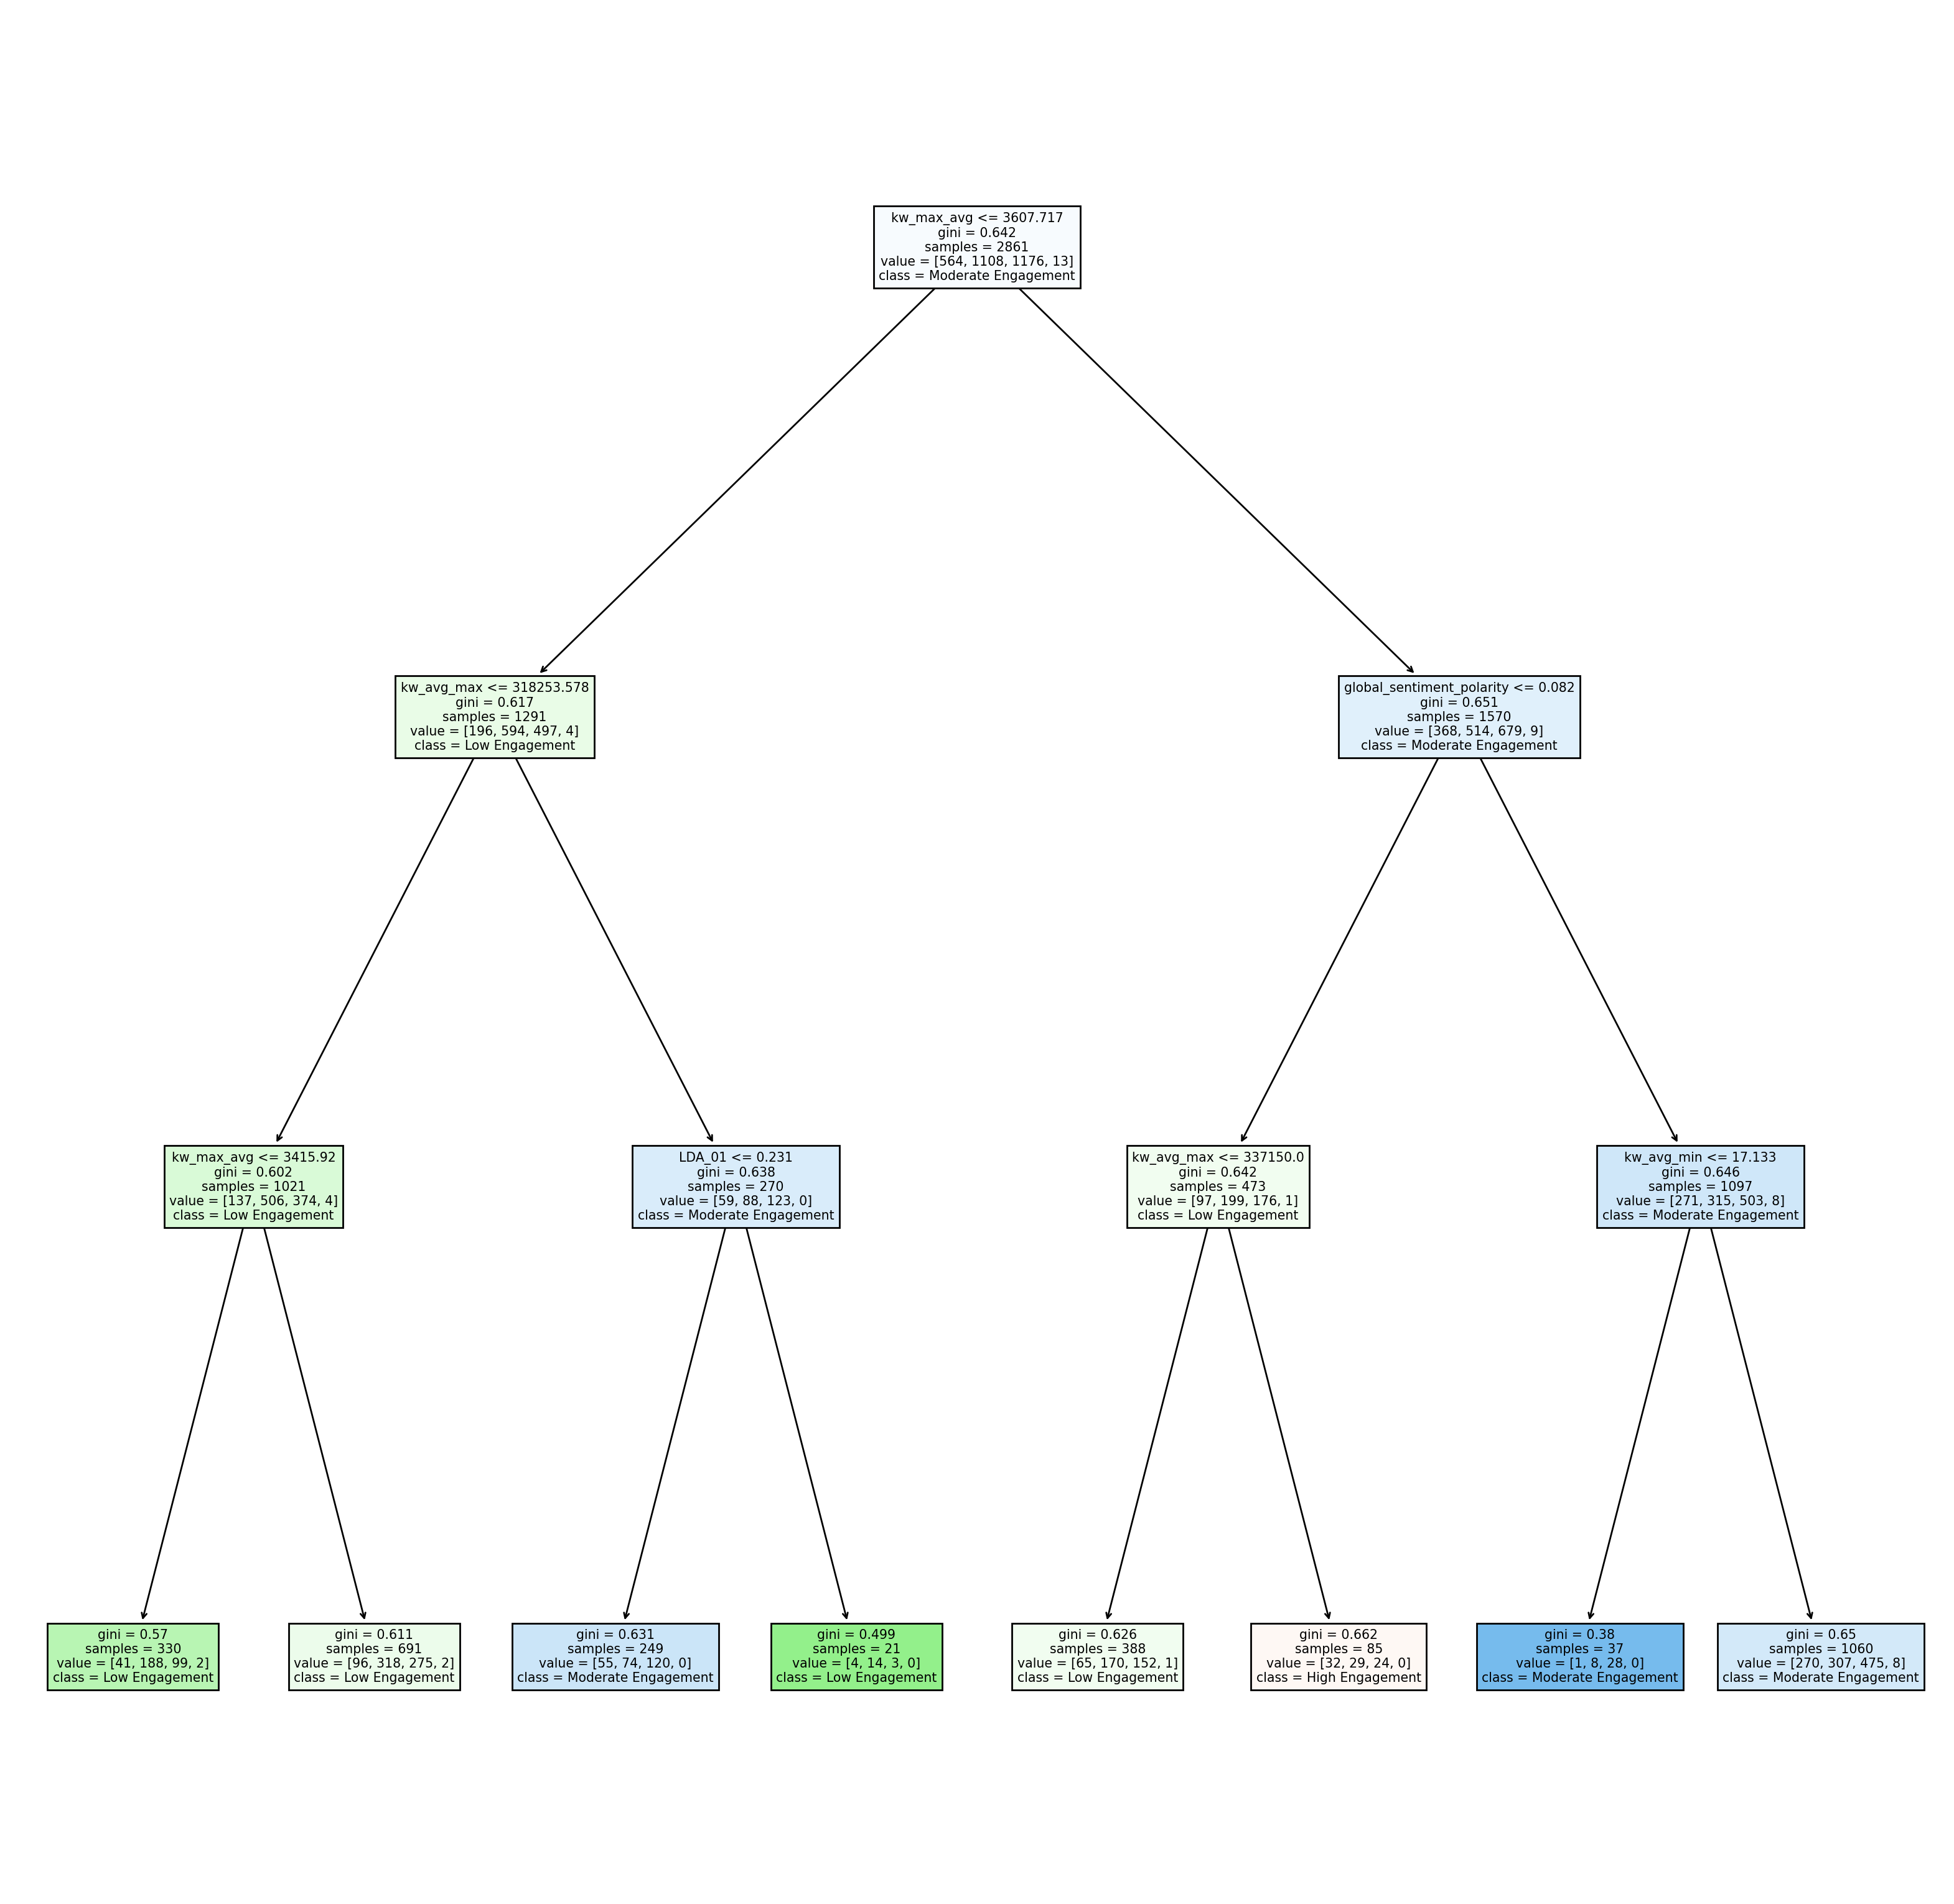

In [97]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 20), dpi=200)
plot_tree(MyDT_R, filled=True, feature_names=X_train.columns, class_names=df['shares_cat'].unique().astype(str), ax=ax)
plt.show()

In [95]:
y_pred1=MyDT_R.predict(X_test)

In [85]:
ac1 = metrics.accuracy_score(y_test, y_pred)
cm1 = metrics.confusion_matrix(y_test, y_pred)

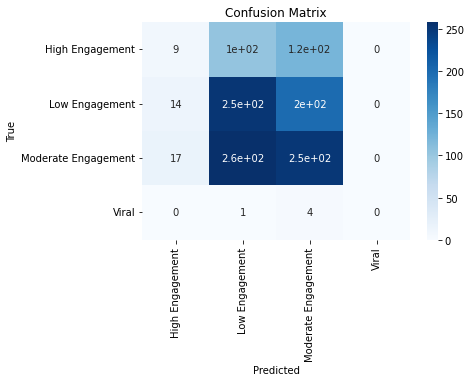

In [92]:
class_names=df['shares_cat'].unique().astype(str)
heatmap=sns.heatmap(cm1, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()